# Example 10: Use of lock for Relativity Addition

In this example, we will symbolically regress $f(u,v)=\frac{u+v}{1+uv}$. In relavitity, we know the rapidity trick $f(u,v)={\rm tanh}({\rm arctanh}\ u+{\rm arctanh}\ v)$. Can we rediscover rapidity trick with KAN?

Intialize model and create dataset

In [1]:
from kan import KAN, create_dataset

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=10, k=3)

# create dataset
f = lambda x: (x[:,[0]]+x[:,[1]])/(1+x[:,[0]]*x[:,[1]])
dataset = create_dataset(f, n_var=2, ranges=[-0.9,0.9])

Train KAN and plot

In [2]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 5.28e-04 | test loss: 6.37e-04 | reg: 2.73e+00 : 100%|██| 20/20 [00:03<00:00,  5.41it/s]


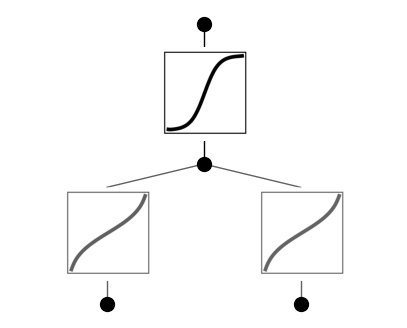

In [3]:
model.plot(beta=10)

We notice that the two functions in the first layer look the same. Let's try to lock them!

In [4]:
model.lock(0,[[0,0],[1,0]])

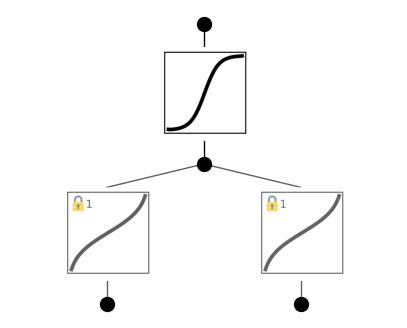

In [5]:
model.plot(beta=10)

Now there are lock symbols in their top left corners!

In [6]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 5.13e-04 | test loss: 6.00e-04 | reg: 2.73e+00 : 100%|██| 20/20 [00:03<00:00,  5.68it/s]


Retrain the model, the loss remains similar, meaning that the locking does not degrade model behavior, justifying our hypothesis that these two activation functions are the same. Let's now determine what this function is using $\texttt{suggest_symbolic}$

In [7]:
model.suggest_symbolic(0,1,0)

function , r2
arctanh , 0.9999993678015309
tan , 0.9998485210873531
arcsin , 0.998865199664262
sqrt , 0.9830640000050016
x^2 , 0.9830517375289431


('arctanh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9999993678015309)

We can see that ${\rm arctanh}$ is at the top of the suggestion list! So we can set both to arctanh, retrain the model, and plot it.

In [8]:
model.fix_symbolic(0,0,0,'arctanh')
model.fix_symbolic(0,1,0,'arctanh')

r2 is 0.9999992221865773
r2 is 0.9999993678015309


tensor(1.0000)

In [9]:
model.train(dataset, opt="LBFGS", steps=20, update_grid=False);

train loss: 2.39e-04 | test loss: 2.54e-03 | reg: 2.73e+00 : 100%|██| 20/20 [00:03<00:00,  6.33it/s]


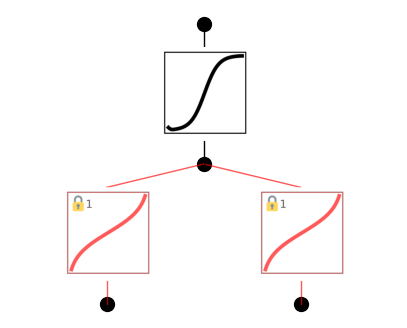

In [10]:
model.plot(beta=10)

We will see that ${\rm tanh}$ is at the top of the suggestion list (${\rm sigmoid}$ is equivalent to tanh given input/ouput affine transformations)! So we can set it to ${\rm tanh}$, retrain the model to machine precision, plot it and finally get the symbolic formula.

In [11]:
model.suggest_symbolic(1,0,0)

function , r2
tanh , 0.9999837308133379
sigmoid , 0.9999837287987492
arctan , 0.9995498634842791
sin , 0.996256989539414
gaussian , 0.9938095927784649


('tanh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9999837308133379)

In [12]:
model.fix_symbolic(1,0,0,'tanh')

r2 is 0.9999837308133379


tensor(1.0000, grad_fn=<SelectBackward0>)

In [13]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 1.69e-11 | test loss: 5.76e-12 | reg: 2.69e+00 : 100%|██| 20/20 [00:00<00:00, 21.70it/s]


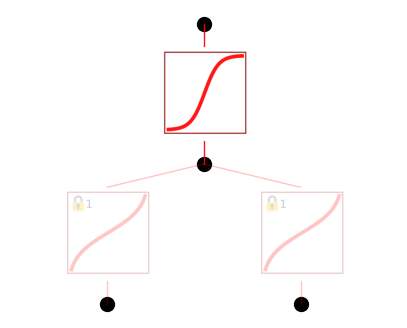

In [14]:
model.plot()

In [15]:
model.symbolic_formula()[0][0]

1.0*tanh(1.0*atanh(1.0*x_1) + 1.0*atanh(1.0*x_2))